<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 1min 24s


**Check the number of rows and columns and print column names.**

In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [7]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [8]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [9]:
flights_df['UniqueCarrier'].nunique()

20

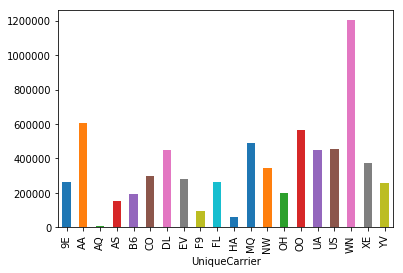

In [10]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

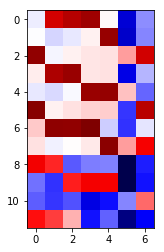

In [14]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

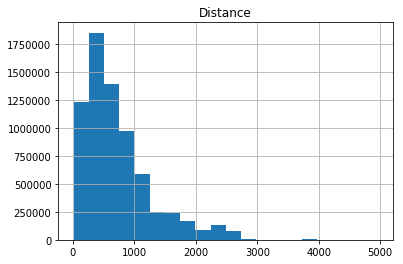

In [15]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [16]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [17]:
num_flights_by_date = flights_df.groupby('Date').size()

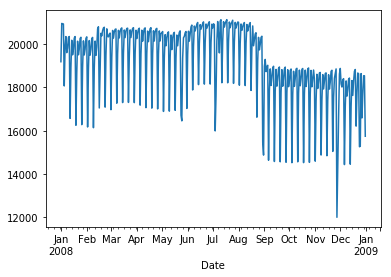

In [18]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

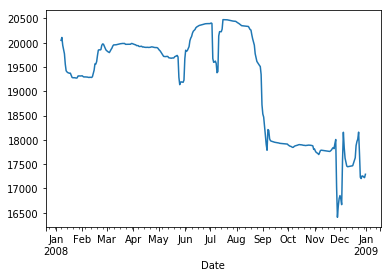

In [19]:
num_flights_by_date.rolling(window=7).mean().plot();

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- 10
- 15
- 20
- 25 

In [20]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [22]:
flights_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [26]:
flights_df.groupby('Cancelled').count()[['Year']].rename(columns={'Year':'Number of flights'})

,Number of flights
Cancelled,
0,6872294
1,137434


In [31]:
ccd = flights_df.groupby('Cancelled').count()[['Year']].rename(columns={'Year':'Number of flights'})
ccd

,Number of flights
Cancelled,
0,6872294
1,137434


In [38]:
6872294/(137434+6872294)

0.9803938184192026

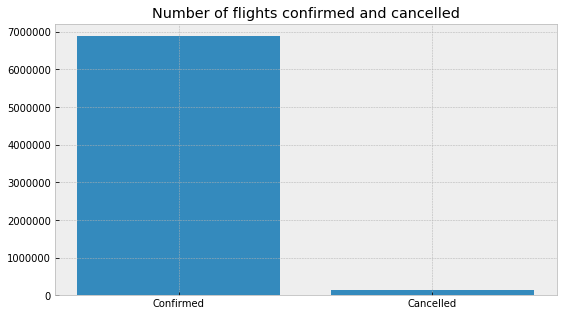

In [37]:
with plt.style.context('bmh'):
    plt.figure(figsize=(9,5))
    plt.bar(['Confirmed','Cancelled'], ccd['Number of flights'])
    ply.legend()
    plt.title('Number of flights confirmed and cancelled')

##### Analysis

They are way more confirmed flights than cancelled ones, as can be seen in the bar plot ahead. To be more specific, 98% of the dataset is composed of confirmed flights. 

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [39]:
flights_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [127]:
flights_df.sort_values(by='DepDelay', ascending=False)[['DepDelay', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest']].head(3)

,DepDelay,UniqueCarrier,FlightNum,Origin,Dest
2235378,2468.0,NW,1699,CLT,MSP
1018798,2456.0,NW,808,HNL,MSP
2832617,1952.0,NW,1107,RSW,DTW


In [128]:
flights_df.sort_values(by='ArrDelay', ascending=False)[['ArrDelay', 'UniqueCarrier', 'FlightNum', 'Origin', 'Dest']].head(3)

,ArrDelay,UniqueCarrier,FlightNum,Origin,Dest
1018798,2460.0,NW,808,HNL,MSP
2235378,2452.0,NW,1699,CLT,MSP
2832617,1951.0,NW,1107,RSW,DTW


##### Analysis

The flights with the longest departure delay is flight number 1699, which fly between CLT airport and MSP airport. Its departure delay is 2468. Similarly the flight with the longest arrival delay is flight number 808, which fly between HNL airport and MSP airport. Its arrival delay is 2460. As a result, both flights have the same arrival airport. 

**4. Find the carrier that has the greatest number of cancelled flights.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- AA
- MQ
- WN
- CO 

In [49]:
flights_df[flights_df.Cancelled==1].groupby('UniqueCarrier')[['Cancelled']].count().sort_values(by='Cancelled', ascending=False)

,Cancelled
UniqueCarrier,
MQ,18331
AA,17440
OO,12436
WN,12389
UA,10541
XE,9992
YV,9219
9E,7100
DL,6813


##### Analysis

From the list above, the company with the most cancelled flight is MQ carrier with 18331 cancelled flights.

**5. Let's examine departure time (*DepTime* column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 6 am
- 11 am  
- 3 pm 

In [51]:
flights_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [65]:
flights_df.DepTime[0]

2003.0

In [73]:
fdf = flights_df.dropna(subset=['DepTime']).reset_index(drop=True)

In [76]:
fdf['DepHour'] = fdf['DepTime']//100

In [80]:
cph = fdf.groupby('DepHour').count()[['FlightNum']].rename(columns={'FlightNum':'Count per Hour'})
cph.head(3)

,Count per Hour
DepHour,
0.0,19847
1.0,5861
2.0,1851


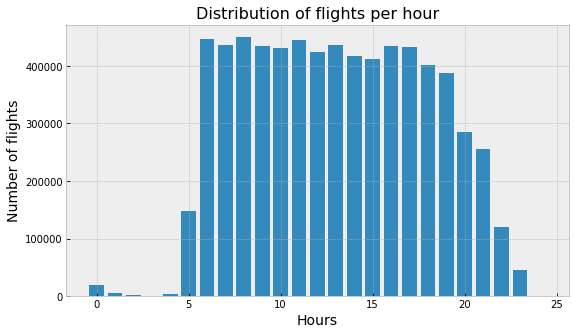

In [85]:
with plt.style.context('bmh'):
    plt.figure(figsize=(9,5))
    plt.bar(cph.index, cph['Count per Hour'])
    plt.xlabel('Hours', size=14)
    plt.ylabel('Number of flights', size=14)
    plt.title('Distribution of flights per hour', size=16)

In [87]:
cph.sort_values(by='Count per Hour', ascending=False).head()

,Count per Hour
DepHour,
8.0,449224
6.0,446737
11.0,444702
7.0,436700
13.0,435917


##### Analysis

From th bar plot, most departure flights are between 6am and 9pm. The hour that has the most departure flight is 8am.

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [92]:
cfd = fdf[fdf.Cancelled==1].groupby('DepHour').count()[['FlightNum']].rename(columns={'FlightNum':'Flight cancelled'})
cfd.head()

,Flight cancelled
DepHour,
0.0,7
1.0,4
2.0,1
4.0,1
5.0,24


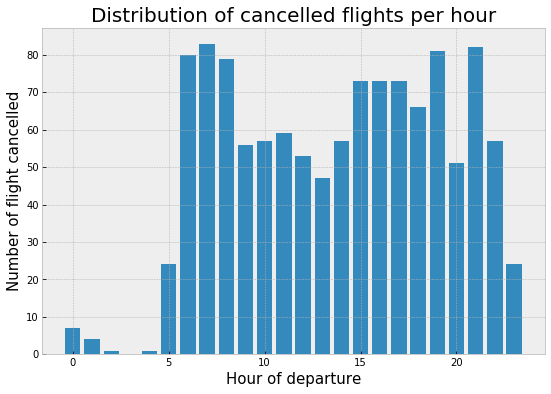

In [96]:
with plt.style.context('bmh'):
    plt.figure(figsize=(9,6))
    plt.bar(cfd.index, cfd['Flight cancelled'])
    plt.xlabel('Hour of departure', size=15)
    plt.ylabel('Number of flight cancelled', size=15)
    plt.title('Distribution of cancelled flights per hour', size=20)

In [99]:
pfd = fdf.groupby('DepHour').agg(lambda x: x[x['Cancelled']==1].count()/x.count())[['FlightNum']].rename(columns={'FlightNum':'Proportion of flight cancelled'})
pfd.head()

,Proportion of flight cancelled
DepHour,
0.0,0.000353
1.0,0.000682
2.0,0.000540
3.0,0.000000
4.0,0.000295


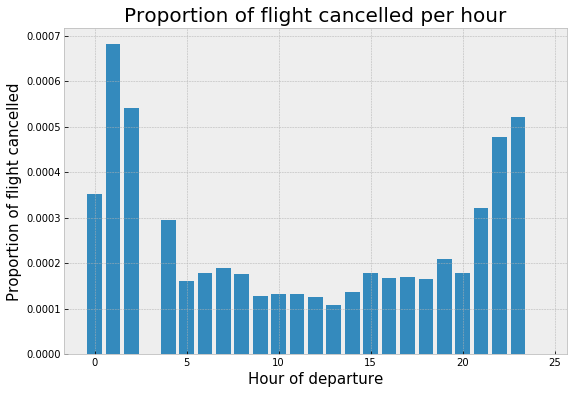

In [100]:
with plt.style.context('bmh'):
    plt.figure(figsize=(9,6))
    plt.bar(pfd.index, pfd['Proportion of flight cancelled'])
    plt.xlabel('Hour of departure', size=15)
    plt.ylabel('Proportion of flight cancelled', size=15)
    plt.title('Proportion of flight cancelled per hour', size=20)

In [102]:
pfd.sort_values(by='Proportion of flight cancelled', ascending=False).head(3)

,Proportion of flight cancelled
DepHour,
1.0,0.000682
2.0,0.000540
23.0,0.000521


##### Analysis

The hour with the higher proportion of flight cancelled is 1 hour with 0.07% of flight cancelled. Yet, from the previous plot, there is also much less departure flight at this time than at the other times.

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 3
- 19
- 22
- 4

##### Analysis

From the previous analysis, the only hour that have no cancelled flight is 3am.

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- 20
- 21
- 9
- 6

In [113]:
fdf.groupby('DepHour').count()[['FlightNum']].rename(columns={'FlightNum':'Departed Flights'}).sort_values(by='Departed Flights', ascending=False).head(3)

,Departed Flights
DepHour,
8.0,449224
6.0,446737
11.0,444702


##### Analysis

The busiest hour is 8am.

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-7 am
- yes, at 9-11 am
- yes, at 1-3 pm

In [116]:
fdf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour'],
      dtype='object')

In [275]:
fdf[['DepDelay']].describe()

,DepDelay
count,6873482.0
mean,NaN
std,NaN
min,-534.0
25%,-4.0
50%,-1.0
75%,8.0
max,2468.0


Surprisingly, it seems that they are a lot flights that departed earlier than expected.

In [118]:
fdf_dn = fdf[fdf.DepDelay < ]

In [119]:
fdf_dn.shape

(3642076, 21)

In [124]:
dn_group = fdf_dn.groupby('DepHour').count()[['FlightNum']].rename(columns={'FlightNum':'Early departed flights'})
dn_group.head(3)

,Early departed flights
DepHour,
0.0,5712
1.0,1101
2.0,499


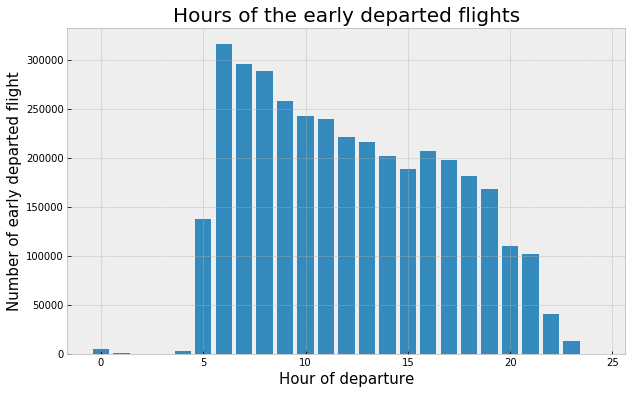

In [126]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.bar(dn_group.index, dn_group['Early departed flights'])
    plt.xlabel('Hour of departure', size=15)
    plt.ylabel('Number of early departed flight', size=15)
    plt.title('Hours of the early departed flights', size=20)

##### Analysis 

It actually happen at lot of departure hours, but mainly between 6am and 7pm

**10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider *all* flights.

- at noon
- at 6 am
- at 8 pm
- at 9 am

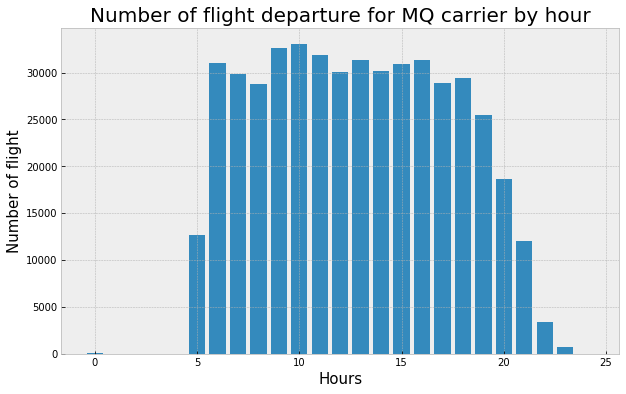

In [277]:
car_group = fdf[fdf.UniqueCarrier == 'MQ'].groupby('DepHour').count()[['FlightNum']]

with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.bar(car_group.index, car_group['FlightNum'])
    plt.xlabel('Hours', size=15)
    plt.ylabel('Number of flight', size=15)
    plt.title('Number of flight departure for MQ carrier by hour', size=20)

In [132]:
car_group.sort_values(by='FlightNum', ascending=False).head(3)

,FlightNum
DepHour,
10.0,33073
9.0,32609
11.0,31872


##### Analysis

The hour with most departure flights from MQ carrier is 10am.

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- DL
- AA
- OO
- EV

In [133]:
fdf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date', 'DepHour'],
      dtype='object')

In [137]:
fdf_comp = fdf[fdf.Cancelled==0]
fdf_comp.groupby('UniqueCarrier').count()[['FlightNum']].rename(columns={'FlightNum':'Completed flights'}).sort_values(by='Completed flights', ascending=False).head(10)

,Completed flights
UniqueCarrier,
WN,1189365
AA,587445
OO,554723
MQ,472362
US,447007
DL,445118
UA,438974
XE,364518
NW,344746


##### Analysis

Among the four carriers listed above, the only one that is not in the top ten of completed flight is EV.

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- Carrier
- Weather conditions
- National Air System
- Security reasons

In [146]:
group_can = flights_df.groupby('CancellationCode').count()[['FlightNum']]
gsum = sum(group_can.FlightNum)
group_can['Freq'] = group_can['FlightNum']/gsum
group_can.head()

,FlightNum,Freq
CancellationCode,,
A,54330,0.395317
B,54904,0.399494
C,28188,0.205102
D,12,0.000087


In [142]:
group_can.shape

(3, 2)

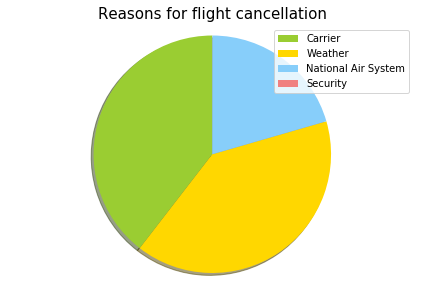

In [149]:
labels = ['Carrier', 'Weather', 'National Air System', 'Security']
sizes = [group_can.Freq[i] for i in range(4)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Reasons for flight cancellation', size=15)
plt.show()

##### Analysis 

The principal reasons for cancellation are Carrier and Weather, then a significant part is also due to National Air System and a very small and non significant part but still existing, due to security.

**13. Which route is the most frequent, in terms of the number of flights?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

*Hint: Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes)*

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (LAX-SFO)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [152]:
flights_df.groupby(['Origin', 'Dest']).count()[['FlightNum']].sort_values(by='FlightNum', ascending=False).head()

,,FlightNum
Origin,Dest,
SFO,LAX,13788
LAX,SFO,13390
OGG,HNL,12383
LGA,BOS,12035
BOS,LGA,12029


##### Analysis

The most frequent route in term of the number of flights is San Francisco - Los Angeles.

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [158]:
flights_df.groupby(['Origin', 'Dest']).apply(lambda x: x[x.DepDelay > 0].count()).sort_values(by='FlightNum', ascending=False)[['FlightNum']].head()

,,FlightNum
Origin,Dest,
LAX,SFO,6253
DAL,HOU,5742
SFO,LAX,5322
ORD,LGA,5311
HOU,DAL,5288


In [169]:
def get_infos(x):
    return [x[(x.DepDelay > 0)].count()['FlightNum'], x[x.CancellationCode=='B'].count()['FlightNum']]

In [170]:
app = flights_df.groupby(['Origin', 'Dest']).apply(lambda x: get_infos(x))

In [174]:
app_df = pd.DataFrame(app, columns=['Fl'])
app_df.head()

Fl
Origin Dest           
ABE    ATL    [318, 7]
       BHM      [1, 0]
       CLE   [107, 12]
       CLT     [46, 1]
       CVG     [23, 1]

In [178]:
app_df.shape

(5366, 1)

In [181]:
Serie1 = [app_df['Fl'][i][0] for i in range(app_df.shape[0])]
Serie2 = [app_df['Fl'][i][1] for i in range(app_df.shape[0])]
app_df['NbFlights'] = Serie1
app_df['WeatherDelay'] = Serie2

In [182]:
app_df.head()

Fl  NbFlights  WeatherDelay
Origin Dest                                    
ABE    ATL    [318, 7]        318             7
       BHM      [1, 0]          1             0
       CLE   [107, 12]        107            12
       CLT     [46, 1]         46             1
       CVG     [23, 1]         23             1

In [184]:
app_df.sort_values(by='NbFlights', ascending=False).head()

,,Fl,NbFlights,WeatherDelay
Origin,Dest,,,
LAX,SFO,"[6253, 27]",6253,27
DAL,HOU,"[5742, 162]",5742,162
SFO,LAX,"[5322, 35]",5322,35
ORD,LGA,"[5311, 207]",5311,207
HOU,DAL,"[5288, 172]",5288,172


##### Analysis

From the top 5 delayed route, 603 were delayed because of the weather. 

**15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [188]:
import scipy.stats as stats

In [189]:
hdf = fdf.groupby('DepHour').count()[['FlightNum']]

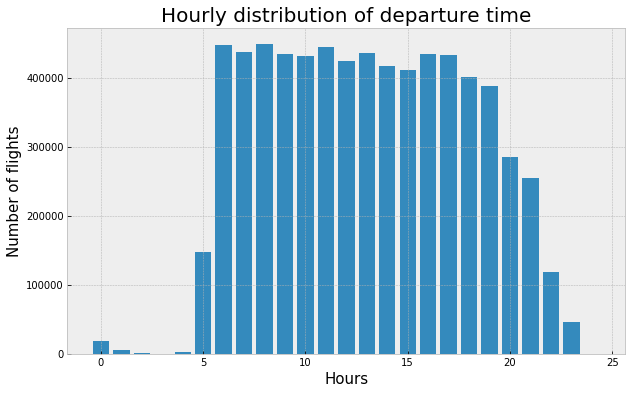

In [200]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.bar(hdf.index, hdf['FlightNum'])
    plt.xlabel('Hours', size=15)
    plt.ylabel('Number of flights', size=15)
    plt.title('Hourly distribution of departure time', size=20)

##### Analysis

From this ditribution, only the last assumption is true: In the period from 0 to 4 am there are considerably less flights than from 7 pm to 8 pm. 

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

In [202]:
flights_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [206]:
ddf = flights_df.groupby('DayOfWeek').count()[['FlightNum']]

In [209]:
mdf = flights_df.groupby('Month').count()[['FlightNum']]

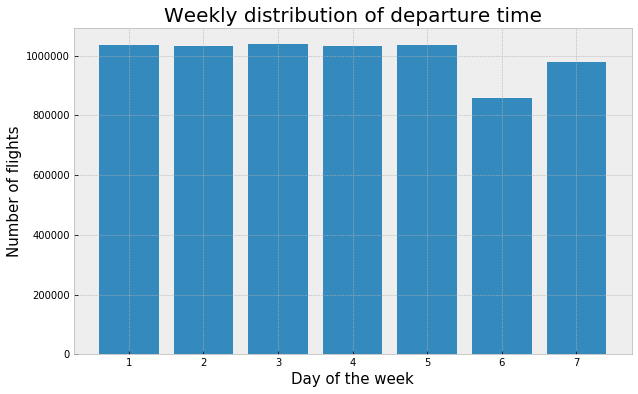

In [208]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.bar(ddf.index, ddf['FlightNum'])
    plt.xlabel('Day of the week', size=15)
    plt.ylabel('Number of flights', size=15)
    plt.title('Weekly distribution of departure time', size=20)

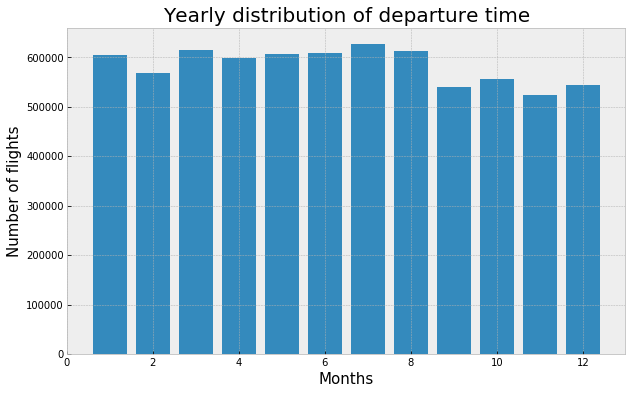

In [210]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.bar(mdf.index, mdf['FlightNum'])
    plt.xlabel('Months', size=15)
    plt.ylabel('Number of flights', size=15)
    plt.title('Yearly distribution of departure time', size=20)

##### Analysis

From the plot, above, we can see that they are less flights during Weekends than during Weekdays. Yet, the lowest number of flights is not on Sunday but on Satursday. We also see that they are less departure flight during winter (months 12-02) than during summer (months 06-08).

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather.
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [213]:
cdf = flights_df.groupby(['CancellationCode','Month']).count()[['FlightNum']]

In [214]:
cdf.head()

FlightNum
CancellationCode Month           
A                1           6635
                 2           6090
                 3           6038
                 4           7312
                 5           3157

In [222]:
cdf = cdf.reset_index()

In [223]:
cdf.head(3)

,CancellationCode,Month,FlightNum
0,A,1,6635
1,A,2,6090
2,A,3,6038


In [229]:
codes

0     A
12    B
24    C
36    D
Name: CancellationCode, dtype: object

In [239]:
pivot_cdf = cdf.pivot(index='Month', columns='CancellationCode', values='FlightNum')
pivot_cdf.head()

CancellationCode,A,B,C,D
Month,,,,
1,6635.0,6711.0,3962.0,NaN
2,6090.0,10034.0,4470.0,2.0
3,6038.0,7520.0,2621.0,4.0
4,7312.0,1479.0,1564.0,NaN
5,3157.0,1461.0,1608.0,3.0


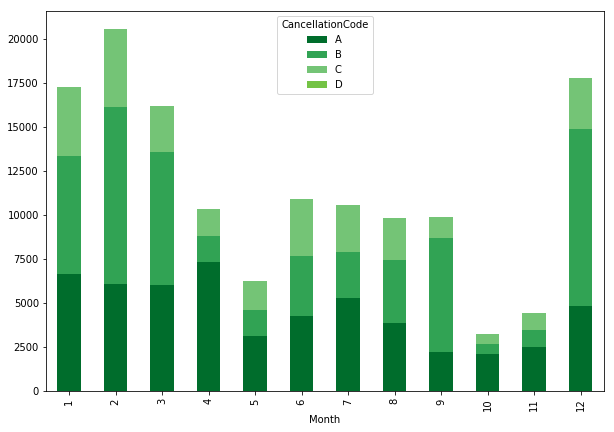

In [243]:
pivot_cdf.plot.bar(stacked=True, color=colors, figsize=(10,7))

##### Plot for weather reason only 

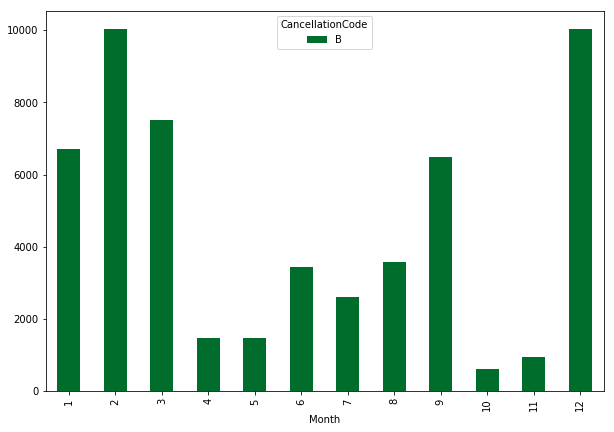

In [244]:
pivot_cdf.loc[:,['B']].plot.bar(stacked=True, color=colors, figsize=(10,7))

##### Flight cancellation due to National Air System

In [250]:
np.sum(cdf[cdf.CancellationCode=='C'].FlightNum)

28188

##### Flight cancellation due to Carrier

In [251]:
np.sum(cdf[cdf.CancellationCode=='A'].FlightNum)

54330

##### Analysis

- October is the month with the lowest number of flight cancelled because of weather.
- The highest number of flight cancelled in september is due to weather and not security.
- April's top cancellation is Carrier.
- Flight cancellation due to National Air System are less frequent than those due to Carrier.


**18. Which month has the greatest number of cancellations due to Carrier?** 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- May
- January
- September
- April

In [253]:
mdf = flights_df[flights_df.CancellationCode=='A']

In [254]:
mdf.groupby('Month').count()[['FlightNum']].sort_values(by='FlightNum', ascending=False).head()

,FlightNum
Month,
4,7312
1,6635
2,6090
3,6038
7,5292


##### Analysis

April is the month with the greatest number of cancellations due to Carrier.

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- 9E
- EV
- HA
- AA

In [258]:
mdf = flights_df[(flights_df.Month==4)&(flights_df.CancellationCode=='A')]

In [259]:
mdf.groupby('UniqueCarrier').count()[['FlightNum']].sort_values(by='FlightNum', ascending=False).head()

,FlightNum
UniqueCarrier,
AA,3696
WN,533
UA,494
YV,454
9E,391


##### Analysis

The carrier with the greatest number of cancellations due to carrier in April is AA.

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- EV
- OO
- AA
- AQ

In [263]:
import statistics

In [260]:
flights_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03


In [262]:
ddf = flights_df[(flights_df.ArrDelay>=0)&(flights_df.DepDelay>=0)]

In [270]:
ddf.groupby('UniqueCarrier').apply(lambda x: statistics.median(x.DepDelay)).sort_values(ascending=False).head()

UniqueCarrier
B6    28.0
UA    24.0
AA    22.0
9E    21.0
MQ    21.0
dtype: float64

In [271]:
ddf.groupby('UniqueCarrier').apply(lambda x: statistics.median(x.ArrDelay)).sort_values(ascending=False).head()

UniqueCarrier
B6    31.0
AA    25.0
UA    25.0
XE    24.0
9E    23.0
dtype: float64

In [278]:
ddf.groupby('UniqueCarrier').apply(lambda x: statistics.median(x.ArrDelay)).sort_values(ascending=True).head()

UniqueCarrier
AQ     6.0
HA     9.0
WN    14.0
F9    14.0
AS    18.0
dtype: float64

In [279]:
ddf.groupby('UniqueCarrier').apply(lambda x: statistics.median(x.ArrDelay)).sort_values(ascending=True).head()

UniqueCarrier
AQ     6.0
HA     9.0
WN    14.0
F9    14.0
AS    18.0
dtype: float64

##### Analysis

B6 is the carrier with the lowest median time delay for both departures and arrivals. 

That's it! Now go and do 30 push-ups! :)

Done!